# Soft Actor-Critic (SAC)

https://spinningup.openai.com/en/latest/algorithms/sac.html

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

tf.logging.set_verbosity(tf.logging.ERROR)

In [22]:
%matplotlib inline

sns.set(rc={"figure.figsize": (12, 8)})

In [2]:
from spinup import sac

help(sac)

Help on function sac in module spinup.algos.sac.sac:

sac(env_fn, actor_critic=<function mlp_actor_critic at 0x7f49010b2950>, ac_kwargs={}, seed=0, steps_per_epoch=5000, epochs=100, replay_size=1000000, gamma=0.99, polyak=0.995, lr=0.001, alpha=0.2, batch_size=100, start_steps=10000, max_ep_len=1000, logger_kwargs={}, save_freq=1)
    Args:
        env_fn : A function which creates a copy of the environment.
            The environment must satisfy the OpenAI Gym API.
    
        actor_critic: A function which takes in placeholder symbols 
            for state, ``x_ph``, and action, ``a_ph``, and returns the main 
            outputs from the agent's Tensorflow computation graph:
    
            ===========  ================  ======================================
            Symbol       Shape             Description
            ===========  ================  ======================================
            ``mu``       (batch, act_dim)  | Computes mean actions from policy
      

## Running Experiments

https://spinningup.openai.com/en/latest/user/running.html

https://spinningup.openai.com/en/latest/user/running.html#launching-from-scripts

https://gym.openai.com/envs/LunarLanderContinuous-v2/

In [ ]:
import os
import shutil

import gym

In [3]:
exp_name = 'LunarLanderContinuous-v2-SAC'
output_dir = os.path.join('data', exp_name)
hidden_sizes = [64, 64]

if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

def env_lunar_lander_continuous_v2():
    return gym.make('LunarLanderContinuous-v2')

logger_kwargs = dict(exp_name=exp_name, output_dir=output_dir)
ac_kwargs = dict(hidden_sizes=hidden_sizes)

sac(env_fn=env_lunar_lander_continuous_v2, ac_kwargs=ac_kwargs, logger_kwargs=logger_kwargs)

Logging data to data/LunarLanderContinuous-v2-SAC/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"mlp_actor_critic",
    "alpha":	0.2,
    "batch_size":	100,
    "env_fn":	"env_lunar_lander_continuous_v2",
    "epochs":	100,
    "exp_name":	"LunarLanderContinuous-v2-SAC",
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f4900f02be0>":	{
            "epoch_dict":	{},
            "exp_name":	"LunarLanderContinuous-v2-SAC",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"data/LunarLanderContinuous-v2-SAC",
            "output_file":	{
                "<_io.TextIOWrapper name='data/LunarLanderContinuous-v2-SAC/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
        "exp_name":	"Luna

## Experiment Outputs

https://spinningup.openai.com/en/latest/user/saving_and_loading.html#loading-and-running-trained-policies

https://github.com/openai/spinningup/blob/master/spinup/utils/test_policy.py


In [4]:
from spinup.utils.test_policy import load_policy, run_policy

env, get_action = load_policy(output_dir)
run_policy(env, get_action)

Using default action op.
Logging data to /tmp/experiments/1574262618/progress.txt
Episode 0 	 EpRet 266.813 	 EpLen 310
Episode 1 	 EpRet 281.345 	 EpLen 304
Episode 2 	 EpRet 240.495 	 EpLen 251
Episode 3 	 EpRet 293.325 	 EpLen 251
Episode 4 	 EpRet 266.523 	 EpLen 287
Episode 5 	 EpRet 272.691 	 EpLen 248
Episode 6 	 EpRet 264.557 	 EpLen 195
Episode 7 	 EpRet 280.605 	 EpLen 395
Episode 8 	 EpRet 90.887 	 EpLen 1000
Episode 9 	 EpRet 282.688 	 EpLen 254
Episode 10 	 EpRet 261.538 	 EpLen 221
Episode 11 	 EpRet 144.758 	 EpLen 1000
Episode 12 	 EpRet 302.533 	 EpLen 353
Episode 13 	 EpRet 272.383 	 EpLen 269
Episode 14 	 EpRet 133.521 	 EpLen 1000
Episode 15 	 EpRet 279.992 	 EpLen 362
Episode 16 	 EpRet 265.472 	 EpLen 583
Episode 17 	 EpRet 282.935 	 EpLen 264
Episode 18 	 EpRet 299.086 	 EpLen 296
Episode 19 	 EpRet 276.858 	 EpLen 257
Episode 20 	 EpRet 271.779 	 EpLen 246
Episode 21 	 EpRet 176.451 	 EpLen 1000
Episode 22 	 EpRet 103.818 	 EpLen 1000
Episode 23 	 EpRet 159.824 

## Plotting Results

https://spinningup.openai.com/en/latest/user/plotting.html

https://github.com/openai/spinningup/blob/master/spinup/utils/plot.py

Plotting from...

data/LunarLanderContinuous-v2-SAC



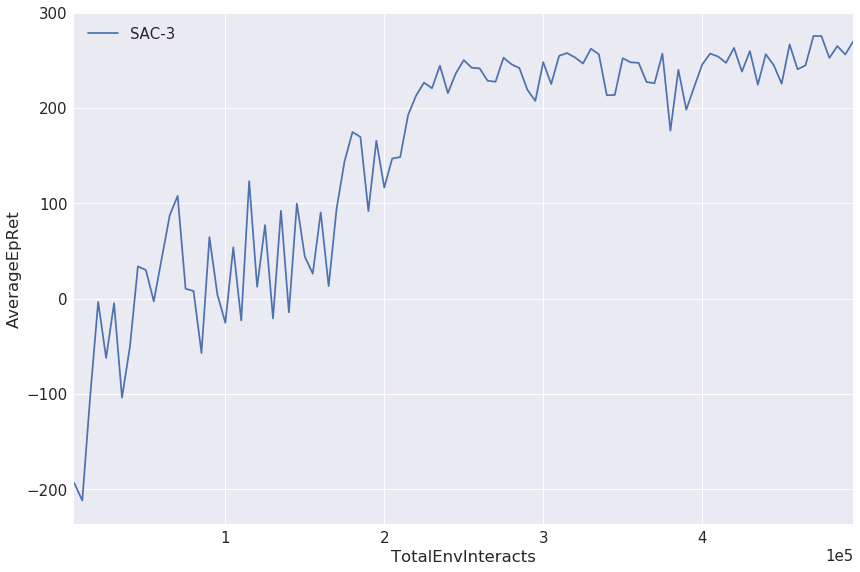

In [23]:
from spinup.utils.plot import make_plots

make_plots([output_dir], ['SAC'], 'TotalEnvInteracts', 'AverageEpRet', True)